## 1. Data Generation

In [3]:
# Before we do anything, lets import the example dataset as a compact generator Python script:
import pandas as pd
import random
from datetime import datetime, timedelta

# Parameters
n = 100
start_date = datetime(2025, 3, 15)
locations = ["Yellowstone NP", "Glacier NP", "Evergladesv NP", "Denali NP", "Yosemite NP", "Grand Canyon NP", "Rocky Mountain NP"]
species = ["Bald Eagle", "Golden Eagle"]
ages = ["Adult", "Juvenile"]
sexes = ["Male", "Female"]
behaviors = ["Nesting", "Flying", "Hunting", "Perched"]

# Generate rows
rows = []
for i in range(1, n+1):
    date = start_date + timedelta(days=i-1)
    sp = random.choice(species)
    age = random.choice(ages)
    sex = random.choice(sexes)
    wingspan = random.randint(175, 230) if age == "Juvenile" else random.randint(200, 230)
    weight = round(random.uniform(3.9, 6.5), 1)
    behavior = random.choice(behaviors)
    location = random.choice(locations)
    rows.append([i, date.strftime("%Y-%m-%d"), location, sp, age, sex, wingspan, weight, behavior])

# Create DataFrame
df = pd.DataFrame(rows, columns=["ObservationID","Date","Location","Species","Age","Sex","WingSpan_cm","Weight_kg","Behavior"])

# Save to CSV
df.to_csv("eagle_data.csv", index=False) 

print(df.head()) 

   ObservationID        Date           Location       Species       Age  \
0              1  2025-03-15     Yellowstone NP  Golden Eagle     Adult   
1              2  2025-03-16  Rocky Mountain NP    Bald Eagle  Juvenile   
2              3  2025-03-17         Glacier NP  Golden Eagle     Adult   
3              4  2025-03-18         Glacier NP    Bald Eagle     Adult   
4              5  2025-03-19         Glacier NP    Bald Eagle     Adult   

      Sex  WingSpan_cm  Weight_kg Behavior  
0  Female          200        4.0  Nesting  
1    Male          198        5.3   Flying  
2  Female          215        5.6   Flying  
3  Female          227        6.0   Flying  
4    Male          218        5.9   Flying  


## 2. Data Visualization

In [7]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_ #array([1, 1, 1, 0, 0, 0,]), indicating the cluster each point belongs to
kmeans.predict([[0, 0], [4, 4]]) #array([1. 0]), predicting the closest cluster each sample in X belongs to
kmeans.cluster_centers_ #array([[4., 2.], [1., 2.]]), coordinates of cluster centers

c:\Users\moores4\.conda\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[3.25, 2.5 ],
       [1.  , 1.  ]])

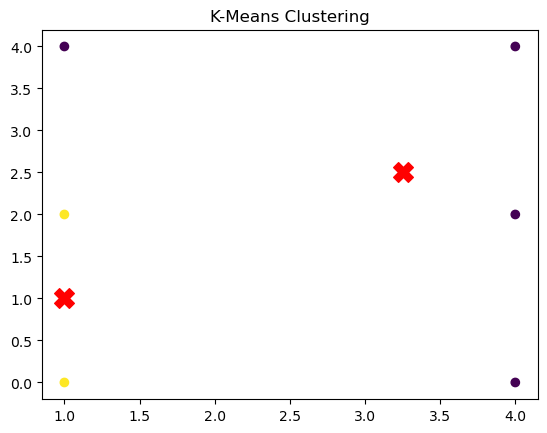

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
# Now we can cluster the data using gaussian mixture models (GMMs) from the sklearn package.

import numpy as np

from sklearn.datasets import make_blobs

n_samples = 

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10


